p1>p2? pval= 0.9104476998751558


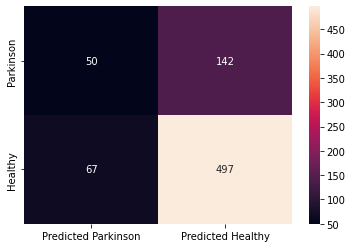

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.arff import loadarff
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats
import seaborn as sns

data = loadarff('/content/pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']

folds = StratifiedKFold(n_splits=10,shuffle=True,random_state=0)

classifiers = [
    ("kNN", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB()),
]

NB = pd.DataFrame()
KNN = pd.DataFrame()
yknn = pd.DataFrame()
ynb = pd.DataFrame()
scores = []
# iterate per fold
for train_k, test_k in folds.split(X, y):
    X_train, X_test = X.iloc[train_k], X.iloc[test_k]
    y_train, y_test = y.iloc[train_k], y.iloc[test_k]

    for name, classifier in classifiers:
      classifier.fit(X_train, y_train)
      y_pred = classifier.predict(X_test)
      if name == "kNN":
        KNN = pd.concat([KNN,pd.DataFrame(y_pred)])
        yknn = pd.concat([yknn,pd.DataFrame(y_test)])
      else:
        NB = pd.concat([NB,pd.DataFrame(y_pred)])
        ynb = pd.concat([ynb,pd.DataFrame(y_test)])
      scores.append(cross_val_score(classifier, X, y, cv=folds))
cmKNN=confusion_matrix(yknn, KNN)
cmNB=confusion_matrix(ynb, NB)
confusionKNN = pd.DataFrame(cmKNN, index=['Parkinson', 'Healthy'], columns=['Predicted Parkinson', 'Predicted Healthy'])
confusionNB = pd.DataFrame(cmNB, index=['Parkinson', 'Healthy'], columns=['Predicted Parkinson', 'Predicted Healthy'])

res = stats.ttest_rel(scores[0], scores[1], alternative='greater')
print("p1>p2? pval=",res.pvalue)
sns.heatmap(confusionKNN,annot=True,fmt='g')


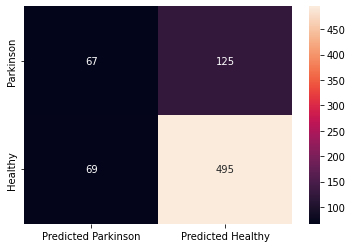

In [ ]:
sns.heatmap(confusionNB,annot=True,fmt='g')